# 포트폴리오 수익률

In [334]:
import pandas as pd

In [335]:
코스피재무제표 = pd.read_csv('./코스피재무제표0505.csv')
전체종목코스피시가총액 = pd.read_csv('./전체종목코스피시가총액.csv')

C:\AI\pythonProject\venv\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [336]:
코스피재무제표

,날짜,종목코드,종목명,시장타입,account_id,재무요소,값
0,199612,1880,DL건설,K,3060,부채비율,5.79
1,199712,1880,DL건설,K,3060,부채비율,5.79
2,199812,1880,DL건설,K,3060,부채비율,6.09
3,199912,1880,DL건설,K,3060,부채비율,3.05
4,200012,1880,DL건설,K,3060,부채비율,2.39
...,...,...,...,...,...,...,...
514524,201712,3280,흥아해운,K,77777,실적보고발표일,20180315.00
514525,201812,3280,흥아해운,K,77777,실적보고발표일,20190321.00
514526,201912,3280,흥아해운,K,77777,실적보고발표일,20200409.00
514527,202012,3280,흥아해운,K,77777,실적보고발표일,20210318.00


# 종목코스 0채우기

In [337]:
코스피재무제표['종목코드'] = 코스피재무제표['종목코드'].astype(str)

In [338]:
코스피재무제표['종목코드'] = 코스피재무제표['종목코드'].str.zfill(6)

In [339]:
코스피재무제표['날짜'] = 코스피재무제표['날짜'].astype('str')

In [42]:
# 코스피재무제표['날짜'] = 코스피재무제표['날짜'].str.extract(r'(\d\d\d\d\d\d)')   #일 제거 연,월까지만

In [340]:
# 코스피재무제표 = 코스피재무제표[코스피재무제표['날짜'].str.contains(r'(\d\d\d\d12)')==True]
코스피재무제표    # 날짜 12월달 만 남기를바라며

,날짜,종목코드,종목명,시장타입,account_id,재무요소,값
0,199612,001880,DL건설,K,3060,부채비율,5.79
1,199712,001880,DL건설,K,3060,부채비율,5.79
2,199812,001880,DL건설,K,3060,부채비율,6.09
3,199912,001880,DL건설,K,3060,부채비율,3.05
4,200012,001880,DL건설,K,3060,부채비율,2.39
...,...,...,...,...,...,...,...
514524,201712,003280,흥아해운,K,77777,실적보고발표일,20180315.00
514525,201812,003280,흥아해운,K,77777,실적보고발표일,20190321.00
514526,201912,003280,흥아해운,K,77777,실적보고발표일,20200409.00
514527,202012,003280,흥아해운,K,77777,실적보고발표일,20210318.00


In [341]:
전체종목코스피시가총액['종목코드'] = 전체종목코스피시가총액['종목코드'].astype(str)

In [342]:
전체종목코스피시가총액['종목코드'] = 전체종목코스피시가총액['종목코드'].str.zfill(6)

In [343]:
전체종목코스피시가총액['Date'] = 전체종목코스피시가총액['Date'].astype(str)

In [160]:
코스피재무제표['값'][(코스피재무제표['재무요소']=='실적보고발표일') & (코스피재무제표['값']==20130430)] = 11111111 # 쿠쿠홀딩스

C:\Users\713\AppData\Local\Temp/ipykernel_9980/3065839349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  코스피재무제표['값'][(코스피재무제표['재무요소']=='실적보고발표일') & (코스피재무제표['값']==20130430)] = 11111111 # 쿠쿠홀딩스


In [344]:
# 코스피재무제표.to_csv('코스피재무제표0505.csv',index=False)

# 10.삼대투자가종합판 

1. 0<per<(18*04)
2. 배당수익률>0   (AAA등급 회사채 수익률* 0.67)
3. 0<pbr<0.65
4. 0<부채비율<=150%
5. 유동비율>200%
6. roe>10%
7. 영업이익률>10%
8. 재고자산회전율 >12
9. 매출채권회전율>6
10. eps성장률 > 10%
11. 0<pcr<10
12. 매출성장률>10%

In [177]:
# 재무요소찾기('매출액증가율')

In [345]:
연도_list = ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']

In [346]:
def 삼대투자종목선정함수(연도_list):
    # 연도_list = ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
    선정기업 = pd.DataFrame()
    for 연도 in 연도_list:
        
        날짜 = 연도

        당해연도 = 코스피재무제표[코스피재무제표['날짜'].str.contains(날짜)]
        당해연도['값'] = 당해연도['값'].astype(float)


        per = 당해연도[(당해연도['재무요소']=='per') &(당해연도['값']>0)& (당해연도['값']<=10)].sort_values('값',ascending=False)
        per리스트 = per.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        유동비율 = 당해연도[(당해연도['재무요소']=='유동비율') & (당해연도['값']>=2)].sort_values('값',ascending=False)
        유동비율리스트 = 유동비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        부채비율 = 당해연도[(당해연도['재무요소']=='부채비율') & (당해연도['값']>0)& (당해연도['값']<=2)].sort_values('값',ascending=False)
        부채비율리스트 = 부채비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        매출액영업이익율 = 당해연도[(당해연도['재무요소']=='매출액영업이익율') & (당해연도['값']>=5)].sort_values('값',ascending=False)
        매출액영업이익율리스트 = 매출액영업이익율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        PCR = 당해연도[(당해연도['재무요소']=='PCR') & (당해연도['값']>0) & (당해연도['값']<10)].sort_values('값',ascending=False)
        PCR리스트 = PCR.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        매출액증가율 = 당해연도[(당해연도['재무요소']=='매출액증가율') &(당해연도['값']>0.16)].sort_values('값',ascending=False)
        매출액증가율리스트 = 매출액증가율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        재고자산회전율 = 당해연도[(당해연도['재무요소']=='재고자산회전율1') & (당해연도['값']>12)].sort_values('값',ascending=False)
        재고자산회전율리스트 = 재고자산회전율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        현금배당수익률 = 당해연도[(당해연도['재무요소']=='현금배당수익률') & (당해연도['값']>=1.5)].sort_values('값',ascending=False)
        현금배당수익률리스트 = 현금배당수익률.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        pbr = 당해연도[(당해연도['재무요소']=='pbr') & (당해연도['값']<1) & (당해연도['값']>0)].sort_values('값',ascending=False)
        pbr리스트 = pbr.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        자기자본순이익율 = 당해연도[(당해연도['재무요소']=='자기자본순이익율') & (당해연도['값']>=0.11)].sort_values('값',ascending=False)
        자기자본순이익율리스트 = 자기자본순이익율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        esp증가율 = 당해연도[(당해연도['재무요소']=='esp증가율') &(당해연도['값']>8)].sort_values('값',ascending=False)
        esp증가율리스트 = esp증가율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        매출채권회전율 = 당해연도[(당해연도['재무요소']=='매출채권회전율') &(당해연도['값']>6)].sort_values('값',ascending=False)
        매출채권회전율리스트 = 매출채권회전율.drop_duplicates('종목명',keep='first')['종목명'].tolist()

        per리스트 = pd.DataFrame(index = per리스트, columns = ['per리스트'])
        per리스트['per리스트'] = 1
        유동비율리스트 = pd.DataFrame(index = 유동비율리스트, columns = ['유동비율리스트'])
        유동비율리스트['유동비율리스트'] = 1
        부채비율리스트 = pd.DataFrame(index = 부채비율리스트, columns = ['부채비율리스트'])
        부채비율리스트['부채비율리스트'] = 1
        매출액영업이익율리스트 = pd.DataFrame(index = 매출액영업이익율리스트, columns = ['매출액영업이익율리스트'])
        매출액영업이익율리스트['매출액영업이익율리스트'] = 1
        PCR리스트 = pd.DataFrame(index = PCR리스트, columns = ['PCR리스트'])
        PCR리스트['PCR리스트'] = 1
        매출액증가율리스트 = pd.DataFrame(index = 매출액증가율리스트, columns = ['매출액증가율리스트'])
        매출액증가율리스트['매출액증가율리스트'] = 1
        재고자산회전율리스트 = pd.DataFrame(index = 재고자산회전율리스트, columns = ['재고자산회전율리스트'])
        재고자산회전율리스트['재고자산회전율리스트'] = 1
        현금배당수익률리스트 = pd.DataFrame(index = 현금배당수익률리스트, columns = ['현금배당수익률리스트'])
        현금배당수익률리스트['현금배당수익률리스트'] = 1
        pbr리스트 = pd.DataFrame(index = pbr리스트, columns = ['pbr리스트'])
        pbr리스트['pbr리스트'] = 1
        자기자본순이익율리스트 = pd.DataFrame(index = 자기자본순이익율리스트, columns = ['자기자본순이익율리스트'])
        자기자본순이익율리스트['자기자본순이익율리스트'] = 1
        esp증가율리스트 = pd.DataFrame(index = esp증가율리스트, columns = ['esp증가율리스트'])
        esp증가율리스트['esp증가율리스트'] = 1
        매출채권회전율리스트 = pd.DataFrame(index = 매출채권회전율리스트, columns = ['매출채권회전율리스트'])
        매출채권회전율리스트['매출채권회전율리스트'] = 1

        항목구하기 = pd.merge(per리스트,유동비율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,부채비율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,매출액영업이익율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,PCR리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,매출액증가율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,재고자산회전율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,현금배당수익률리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,pbr리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,자기자본순이익율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,esp증가율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,매출채권회전율리스트,left_index=True, right_index=True,how='left')

        항목구하기 = 항목구하기.fillna(0)

        항목구하기['총점수'] = (항목구하기['per리스트'] + 항목구하기['유동비율리스트']
                        + 항목구하기['부채비율리스트'] + 항목구하기['매출액영업이익율리스트']
                        + 항목구하기['PCR리스트'] + 항목구하기['매출액증가율리스트']
                        + 항목구하기['재고자산회전율리스트'] + 항목구하기['현금배당수익률리스트']
                        + 항목구하기['pbr리스트'] + 항목구하기['자기자본순이익율리스트']
                        + 항목구하기['esp증가율리스트'] + 항목구하기['매출채권회전율리스트'])

        항목구하기 = 항목구하기.sort_values('총점수',ascending=False)   #항목구하기도 나중에 데이터프레임 연도별로 컨캣해야함!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        종목선정완료 = 항목구하기.index.tolist()

        # 종목선정완료된 종목코드 뽑아내기
        종목코드_list = []
        for i,col in enumerate(종목선정완료[:20]):
            종목코드_list.append(당해연도['종목코드'][당해연도['종목명']==col].unique().tolist())
        종목코드_list = sum(종목코드_list,[])
        
        #종목코드_list넣기
        선정기업[날짜] = 종목코드_list
        선정기업연도 = 선정기업.columns.tolist()   # 여기서 날짜로 변환해야함 단일값으로
    
    

    
    return 선정기업, 선정기업연도

In [347]:
선정기업, 선정기업연도 = 삼대투자종목선정함수(연도_list)
print(선정기업연도)
선정기업

C:\Users\713\AppData\Local\Temp/ipykernel_9980/1336939439.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  당해연도['값'] = 당해연도['값'].astype(float)


['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,016800,009680,009680,005880,009270,009680,092230,025000,001940,033240,017370,134380,024090,027410,006650,134380,004540,003650
1,005930,016800,006650,016800,005950,092230,111770,096770,008060,051630,084670,084670,010690,004970,267290,053690,035510,078930
2,023450,078930,005880,009270,025000,006650,025000,037710,000700,000660,002460,015760,100220,011170,281820,084670,017390,004000
3,006400,001070,010130,037710,003200,016710,003200,069620,004970,023810,033240,034730,078930,044450,004000,120030,000700,000970
4,017390,005430,051630,003160,016590,023810,004970,033240,016590,014440,112610,014530,010960,014440,029460,010960,192400,002310
5,007810,013580,002100,025890,016800,051630,084670,017670,053210,094280,053690,123700,034730,005930,017670,005960,134380,010060
6,072710,003200,033530,006650,023590,035250,020000,017940,192400,005810,016590,078930,001630,005880,003300,077500,136490,011200
7,001230,015230,017390,002960,007690,084670,000430,015230,092230,015020,051630,058850,034310,003240,016590,003780,001800,084010
8,001420,025890,001420,023810,009680,037710,018670,010130,001800,120030,075180,016710,009770,017670,003030,058860,057050,028670
9,002220,020000,016590,008700,012610,001560,023800,123700,000670,015230,025000,011170,143210,014130,005930,100220,000070,001120


# 기타

## 함수의 함수

In [ ]:
# def call_processing(year1, year2):
#     삼대투자종목선정함수(year1)
#     print("---done--")
#     린치종목선정함수(year2)
#     print("---done--")
# call_processing(2021, 2022)

In [369]:
# # 종목코드구하기

# 종목코드_list = []
# for i,col in enumerate(res_list[:10]):
#     종목코드_list.append(코스피재무제표['종목코드'][코스피재무제표['종목명']==col].unique().tolist())
# 종목코드_list = sum(종목코드_list,[])
# 종목코드_list

In [195]:
# # 채권수익률
# 2022	3.061					
# 2021	2.083					
# 2020	2.128					
# 2019	2.023					
# 2018	2.651					
# 2017	2.325					
# 2016	1.886					
# 2015	2.084					
# 2014	2.983					
# 2013	3.191
# 2012	3.76					
# 2011	4.41					
# 2010	4.65					
# 2009	5.79					
# 2008	7.04					
# 2007	5.70					
# 2006	5.17					
# 2005	4.69					
# 2004	4.71					
# 2003	5.43					
# 2002	6.56

In [321]:
# 코스피재무제표[코스피재무제표['재무요소']=='eps']

# 수익률 구하는 함수만들자!!!!!!!!!!!
* https://skyeong.net/271  # 포트폴리오 수익률 계산법 참고

In [14]:
종목코드_list   #20개

['024090',
 '010690',
 '100220',
 '078930',
 '010960',
 '034730',
 '001630',
 '034310',
 '009770',
 '143210',
 '023150',
 '183190',
 '084690',
 '103140',
 '005720',
 '100250',
 '019440',
 '010770',
 '005430',
 '096770']

In [15]:
항목구하기.head()

,per리스트,유동비율리스트,부채비율리스트,매출액영업이익율리스트,PCR리스트,매출액증가율리스트,재고자산회전율리스트,현금배당수익률리스트,pbr리스트,자기자본순이익율리스트,esp증가율리스트,매출채권회전율리스트,총점수
디씨엠,1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,10.0
화신,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,8.0
비상교육,1,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,8.0
GS,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,8.0
삼호개발,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,8.0


## 실적보고발표일만들기

In [81]:
실적보고발표일 = 코스피재무제표[코스피재무제표['재무요소']=='실적보고발표일']

In [82]:
실적보고발표일['값'][실적보고발표일['값'].isna()]= 11111111

C:\Users\713\AppData\Local\Temp/ipykernel_9980/1258071772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  실적보고발표일['값'][실적보고발표일['값'].isna()]= 11111111


In [83]:
실적보고발표일['값'] = 실적보고발표일['값'].astype(int)

C:\Users\713\AppData\Local\Temp/ipykernel_9980/3569025128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  실적보고발표일['값'] = 실적보고발표일['값'].astype(int)


In [84]:
실적보고발표일['값'] = 실적보고발표일['값'].astype(str)

C:\Users\713\AppData\Local\Temp/ipykernel_9980/3538239224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  실적보고발표일['값'] = 실적보고발표일['값'].astype(str)


In [21]:
전체종목코스피시가총액.head()

,Date,종목코드,종목명,종가,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,20000104,030200,한국통신공사,169000,182000,186000,160000,2344578,402099277000,52761742371000,312199659
1,20000104,005930,삼성전자,305500,300000,305500,283000,1483967,444233178500,45775746373500,149838777
2,20000104,017670,SK텔레콤,3800000,3901000,4050000,3470000,35998,135530050000,31675945000000,8335775
3,20000104,015760,한국전력,36000,35600,38500,34550,2341020,85192452500,23036081220000,639891145
4,20000104,005490,포항제철,142000,134000,143500,129000,971898,133867921000,13700248750000,96480625


In [22]:
종목코드_list #2016년이니 2017년 3월쯤 들어온 재무제표기준으로 2016년 3월말에 매수한다고 가정해야합니다.

['024090',
 '010690',
 '100220',
 '078930',
 '010960',
 '034730',
 '001630',
 '034310',
 '009770',
 '143210',
 '023150',
 '183190',
 '084690',
 '103140',
 '005720',
 '100250',
 '019440',
 '010770',
 '005430',
 '096770']

In [23]:
실적발표_list = []
for col in 종목코드_list:
    발표일 = 실적보고발표일['값'][(실적보고발표일['날짜']=='201612') & (실적보고발표일['종목코드']==col)]
    실적발표_list.extend(발표일)

매수기준날짜 = max(실적발표_list)    # 선정된 종목 실적 발표일 중 마지막날  

In [24]:
매수기준날짜

'20170323'

In [25]:
종목가격 = pd.DataFrame()
for 종목 in 종목코드_list:
    
    종목 = 전체종목코스피시가총액[(전체종목코스피시가총액['Date']=='20170324') & (전체종목코스피시가총액['종목코드']== 종목)]
    종목가격 = pd.concat([종목가격,종목],axis=0)
    
종목가격.sort_values('시가총액',ascending=False)[:5]

,Date,종목코드,종목명,종가,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
3637183,20170324,034730,SK,232000,236500,236500,229000,90228,20891290000,16323588904000,70360297
3637184,20170324,096770,SK이노베이션,163500,164500,165000,163000,124176,20352988000,15118119714000,92465564
3637217,20170324,078930,GS,56900,56400,56900,55400,155439,8743316500,5286885008200,92915378
3637326,20170324,103140,풍산,39000,39300,39350,38250,223578,8690253350,1092946842000,28024278
3637383,20170324,034310,NICE,17000,16900,17250,16900,53271,914373600,643999100000,37882300


## 시가총액 기준 Top5 선정

In [26]:
포트폴리오종목선정 = 종목가격.sort_values('시가총액',ascending=False)[:5]
포트폴리오종목이름 = 포트폴리오종목선정['종목명'].tolist()
포트폴리오종목코드 = 포트폴리오종목선정['종목코드'].tolist()  # 다섯개

In [27]:
포트폴리오종목코드  # 종목다섯개

['034730', '096770', '078930', '103140', '034310']

In [28]:
포트폴리오종목선정

,Date,종목코드,종목명,종가,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
3637183,20170324,034730,SK,232000,236500,236500,229000,90228,20891290000,16323588904000,70360297
3637184,20170324,096770,SK이노베이션,163500,164500,165000,163000,124176,20352988000,15118119714000,92465564
3637217,20170324,078930,GS,56900,56400,56900,55400,155439,8743316500,5286885008200,92915378
3637326,20170324,103140,풍산,39000,39300,39350,38250,223578,8690253350,1092946842000,28024278
3637383,20170324,034310,NICE,17000,16900,17250,16900,53271,914373600,643999100000,37882300


## 동일가중방식 수익률 산정

In [29]:
import numpy as np

In [30]:
가중치 = np.array([0.2,0.2,0.2,0.2,0.2])  # 5종목이니까 자금의 20%씩
가중치

array([0.2, 0.2, 0.2, 0.2, 0.2])

## 시작날짜와 1년뒤 날짜 설정

In [87]:
# ! pip install pykrx

In [40]:
from pykrx import stock
from pykrx import bond

In [32]:
시작날짜 = '20170324' #매수기준날짜에서 다음주식거래날짜
일년뒤날짜 = '20180323' #시작날짜에서 1년뒤 거래날짜

## 종가데이터만 불러서 데이터프레임화

In [33]:
종가 = pd.DataFrame()
for ticker in 포트폴리오종목코드:
    df = stock.get_market_ohlcv(시작날짜, 일년뒤날짜, ticker)
    종가 = pd.concat([종가,df['종가']],axis=1)
종가.columns = 포트폴리오종목이름
종가

,SK,SK이노베이션,GS,풍산,NICE
2017-03-24,232000,163500,56900,39000,17000
2017-03-27,229000,162000,56400,38700,17000
2017-03-28,237000,163000,56900,38600,17050
2017-03-29,242000,163000,56900,38700,17200
2017-03-30,240000,164500,57800,39000,17300
...,...,...,...,...,...
2018-03-19,309500,211000,63600,41500,14850
2018-03-20,310000,211500,63600,40800,15350
2018-03-21,308000,212000,63500,40150,15250
2018-03-22,307000,213500,64400,40000,15250


## 차트 시각화 (option)

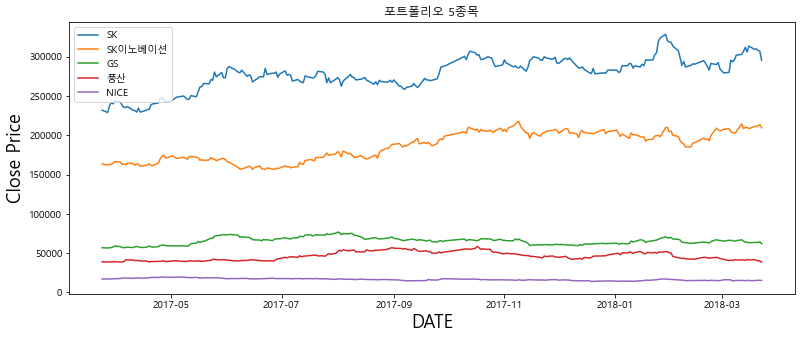

In [34]:
from matplotlib import pyplot as plt
제목 = '포트폴리오 5종목'
my_stocks = 종가
plt.figure(figsize=(13,5))

for stock in my_stocks.columns.values:
    plt.plot(my_stocks[stock],label=stock)

plt.title(제목)
plt.xlabel('DATE',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

## 재무계산하기

### 단순 하루 수익률

In [35]:
일별수익률 = 종가.pct_change()
일별수익률

,SK,SK이노베이션,GS,풍산,NICE
2017-03-24,NaN,NaN,NaN,NaN,NaN
2017-03-27,-0.012931,-0.009174,-0.008787,-0.007692,0.000000
2017-03-28,0.034934,0.006173,0.008865,-0.002584,0.002941
2017-03-29,0.021097,0.000000,0.000000,0.002591,0.008798
2017-03-30,-0.008264,0.009202,0.015817,0.007752,0.005814
...,...,...,...,...,...
2018-03-19,-0.012759,0.011990,0.007924,0.004843,-0.016556
2018-03-20,0.001616,0.002370,0.000000,-0.016867,0.033670
2018-03-21,-0.006452,0.002364,-0.001572,-0.015931,-0.006515
2018-03-22,-0.003247,0.007075,0.014173,-0.003736,0.000000


In [36]:
연간단순수익률 = np.sum(일별수익률.mean()*가중치)*250
연간단순수익률

0.13414733260741848

In [216]:
# np.sum(일별수익률.mean())*250

0.6707366630370923

In [37]:
# 처음 = 종가.iloc[0]
# 끝 = 종가.iloc[-1]
# 처음과끝 = pd.concat([처음,끝],axis=1)
# 연수익 = 처음과끝.transpose().pct_change()
# (sum(연수익.iloc[1].tolist())/5)

# 실적발표일 이후 정확하게 매수날짜 잡는 방법

In [213]:
# 매도날짜 = '20190502'

In [205]:
import datetime as dt
날짜 = dt.datetime.strptime(매도날짜,"%Y%m%d")
# +dt.timedelta(days=2)
if (날짜 + dt.timedelta(days=355)).weekday() ==5:
    날짜 = (날짜 + dt.timedelta(days=357))
elif (날짜 + dt.timedelta(days=355)).weekday() ==6:
        날짜 = (날짜 + dt.timedelta(days=356))
else:
    
    날짜 = 날짜 + dt.timedelta(days=355)
            
Y = datetime.datetime.strftime(날짜,'%Y')
M =datetime.datetime.strftime(날짜,'%m')
D = datetime.datetime.strftime(날짜,'%d')
매도날짜 = Y+M+D
매도날짜

'20210412'

In [207]:
# datetime.datetime.strftime(날짜,'%Y')

'2021'

In [110]:
# str(int(매수기준날짜)+1)

'20170324'

In [330]:
import datetime as dt
import pandas as pd
import numpy as np
from pykrx import stock
from pykrx import bond

# 연간수익률 (시가총액탑5기준) 구하는 함수

In [150]:
# import datetime as dt
# from pykrx import stock
# from pykrx import bond


# def 연간수익률(날짜,종목코드_list):   #종목코드_list 는 연도를 넣어서 해당연도로 선정된 종목코드_list입니다.
#     # 날짜,종목코드_list,항목구하기 를 전의 함수에서 불러옵니다.
#     날짜 =날짜 + str(12)  #12월재무제표라 12를 붙여준다.
#     # 날짜
    
#     #실적보고발표일 값 불러오기
#     실적보고발표일 = 코스피재무제표[코스피재무제표['재무요소']=='실적보고발표일']
#     실적보고발표일['값'][실적보고발표일['값'].isna()]= 11111111  # 널값채워넣기최소값으로
#     실적보고발표일['값'] = 실적보고발표일['값'].astype(int)
#     실적보고발표일['값'] = 실적보고발표일['값'].astype(str)
    
#     #실적보고발표종목의 마지막날짜 불러오기
#     실적발표_list = []
#     for col in 종목코드_list:
#         발표일 = 실적보고발표일['값'][(실적보고발표일['날짜']== 날짜 ) & (실적보고발표일['종목코드']==col)]
#         실적발표_list.extend(발표일)

#     매수기준날짜 = max(실적발표_list)    # 선정된 종목 실적 발표일 중 마지막날  
    
#     날짜 = dt.datetime.strptime(매수기준날짜,"%Y%m%d")

#     if (날짜 + dt.timedelta(days=1)).weekday() ==5:
#         날짜 = (날짜 + dt.timedelta(days=3))
#     elif (날짜 + dt.timedelta(days=1)).weekday() ==6:
#         날짜 = (날짜 + dt.timedelta(days=2))
#     else:
#         날짜 = 날짜 + dt.timedelta(days=1)
            
#     Y = dt.datetime.strftime(날짜,'%Y')
#     M =dt.datetime.strftime(날짜,'%m')
#     D = dt.datetime.strftime(날짜,'%d')
#     매수날짜 = Y+M+D
#     # 매수날짜


#     #연도와,재무요소에 맞춰서 선정된종목들중 시가총액을 기준으로 상위 5개를 발표일일 다음날에 맞춰서 불러오기
#     #매수기준날짜 나중에 사용해야함!!!!!!!!!!!!!!!!!!!!!!!
#     종목가격 = pd.DataFrame()
#     for 종목 in 종목코드_list:
        

#         종목시가총액 = stock.get_market_cap(매수날짜)  #
#         종목시가총액 = 종목시가총액.rename_axis('종목코드').reset_index()
#         종목행 = 종목시가총액[종목시가총액['종목코드']==종목]
#         종목가격 = pd.concat([종목가격,종목행],axis=0)
#         포트폴리오종목코드 = 종목가격.sort_values('시가총액',ascending=False)[:5]['종목코드'].tolist() #다섯개
    
#     #포트폴리오 수익률 구하기전 최종 종목코드,이름,데이터프레임
#     포트폴리오종목명 = []
#     for 종목 in 포트폴리오종목코드:
        
#         포트폴리오 = 실적보고발표일['종목명'][실적보고발표일['종목코드']==종목].unique().tolist()
#         포트폴리오종목명.append(포트폴리오)
#     포트폴리오종목명= sum(포트폴리오종목명,[])
#     # 포트폴리오종목명
  
    
    
#     #동일가중방식 수익률 산정
#     가중치 = np.array([0.2,0.2,0.2,0.2,0.2])  # 5종목이니까 자금의 20%씩
    
#     #시작날짜와 1년뒤 날짜 설정 이것도 주식거래날에 맞춰서 다음에 함수수정해야해!!!!!!!!!!!!!!!!!!!!!!
#     시작날짜 = 매수날짜 #매수기준날짜에서 다음주식거래날짜
#     #시작날짜에서 1년뒤 거래날짜
#     날짜 = dt.datetime.strptime(시작날짜,"%Y%m%d")

#     if (날짜 + dt.timedelta(days=355)).weekday() ==5:
#         날짜 = (날짜 + dt.timedelta(days=357))
#     elif (날짜 + dt.timedelta(days=355)).weekday() ==6:
#         날짜 = (날짜 + dt.timedelta(days=356))
#     else:
#         날짜 = 날짜 + dt.timedelta(days=355)
            
#     Y = dt.datetime.strftime(날짜,'%Y')
#     M =dt.datetime.strftime(날짜,'%m')
#     D = dt.datetime.strftime(날짜,'%d')
#     매도날짜 = Y+M+D
    
#     #종가데이터만 불러서 선정된5개종목의 종가 데이터프레임화
#     종가 = pd.DataFrame()
#     for ticker in 포트폴리오종목코드:
#         df = stock.get_market_ohlcv(시작날짜, 매도날짜, ticker)
#         종가 = pd.concat([종가,df['종가']],axis=1)
#     종가.columns = 포트폴리오종목명
    
#     #종가데이터로 수익률 계산하기.
    
#     일별수익률 = 종가.pct_change()
#     연간단순수익률 = np.sum(일별수익률.mean()*가중치)*250
    
#     return 매수날짜,매도날짜,포트폴리오종목명,일별수익률,연간단순수익률,실적발표_list
    

# 최종본 만드는중

In [299]:
print(선정기업연도)
선정기업.head()
선정기업.columns.tolist()
선정기업['2004'].tolist()

['2004', '2005']


['016800',
 '005930',
 '023450',
 '006400',
 '017390',
 '007810',
 '072710',
 '001230',
 '001420',
 '002220',
 '010130',
 '005880',
 '002960',
 '051910',
 '037710',
 '020000',
 '015890',
 '003160',
 '003120',
 '009680']

In [348]:
import datetime as dt
from pykrx import stock
from pykrx import bond


def 연간수익률(선정기업):   #종목코드_list 는 연도를 넣어서 해당연도로 선정된 종목코드_list입니다.
    연간수익률 = pd.DataFrame()
    연간수익률_list = []
    포트폴리오종목명_list = []
    시작날짜_list = []
    매도날짜_list = []
    for 연도순서,연도날짜 in enumerate(선정기업.columns.tolist()):
        
        종목코드_list = 선정기업[연도날짜].tolist()
        
        # 날짜,종목코드_list,항목구하기 를 전의 함수에서 불러옵니다.
        날짜 =연도날짜 + str(12)  #12월재무제표라 12를 붙여준다.
        # 날짜
        
        

        #실적보고발표일 값 불러오기
        실적보고발표일 = 코스피재무제표[코스피재무제표['재무요소']=='실적보고발표일']
        실적보고발표일['값'][실적보고발표일['값'].isna()]= 11111111  # 널값채워넣기최소값으로
        실적보고발표일['값'] = 실적보고발표일['값'].astype(int)
        실적보고발표일['값'] = 실적보고발표일['값'].astype(str)

        #실적보고발표종목의 마지막날짜 불러오기
        실적발표_list = []
        for col in 종목코드_list:
            발표일 = 실적보고발표일['값'][(실적보고발표일['날짜']== 날짜 ) & (실적보고발표일['종목코드']==col)]
            실적발표_list.extend(발표일)

        매수기준날짜 = max(실적발표_list)    # 선정된 종목 실적 발표일 중 마지막날  

        날짜 = dt.datetime.strptime(매수기준날짜,"%Y%m%d")

        if (날짜 + dt.timedelta(days=1)).weekday() ==5:
            날짜 = (날짜 + dt.timedelta(days=3))
        elif (날짜 + dt.timedelta(days=1)).weekday() ==6:
            날짜 = (날짜 + dt.timedelta(days=2))
        else:
            날짜 = 날짜 + dt.timedelta(days=1)

        Y = dt.datetime.strftime(날짜,'%Y')
        M =dt.datetime.strftime(날짜,'%m')
        D = dt.datetime.strftime(날짜,'%d')
        매수날짜 = Y+M+D
        # 매수날짜


        #연도와,재무요소에 맞춰서 선정된종목들중 시가총액을 기준으로 상위 5개를 발표일일 다음날에 맞춰서 불러오기
        #매수기준날짜 나중에 사용해야함!!!!!!!!!!!!!!!!!!!!!!!
        종목가격 = pd.DataFrame()
        for 종목 in 종목코드_list:


            종목시가총액 = stock.get_market_cap(매수날짜)  #
            종목시가총액 = 종목시가총액.rename_axis('종목코드').reset_index()
            종목행 = 종목시가총액[종목시가총액['종목코드']==종목]
            종목가격 = pd.concat([종목가격,종목행],axis=0)
            포트폴리오종목코드 = 종목가격.sort_values('시가총액',ascending=False)[:5]['종목코드'].tolist() #다섯개

        #포트폴리오 수익률 구하기전 최종 종목코드,이름,데이터프레임
        포트폴리오종목명 = []
        for 종목 in 포트폴리오종목코드:

            포트폴리오 = 실적보고발표일['종목명'][실적보고발표일['종목코드']==종목].unique().tolist()
            포트폴리오종목명.append(포트폴리오)
        포트폴리오종목명= sum(포트폴리오종목명,[])
        # 포트폴리오종목명



        #동일가중방식 수익률 산정
        가중치 = np.array([0.2,0.2,0.2,0.2,0.2])  # 5종목이니까 자금의 20%씩

        #시작날짜와 1년뒤 날짜 설정 이것도 주식거래날에 맞춰서 다음에 함수수정해야해!!!!!!!!!!!!!!!!!!!!!!
        시작날짜 = 매수날짜 #매수기준날짜에서 다음주식거래날짜
        #시작날짜에서 1년뒤 거래날짜
        날짜 = dt.datetime.strptime(시작날짜,"%Y%m%d")

        if (날짜 + dt.timedelta(days=355)).weekday() ==5:
            날짜 = (날짜 + dt.timedelta(days=357))
        elif (날짜 + dt.timedelta(days=355)).weekday() ==6:
            날짜 = (날짜 + dt.timedelta(days=356))
        else:
            날짜 = 날짜 + dt.timedelta(days=355)

        Y = dt.datetime.strftime(날짜,'%Y')
        M =dt.datetime.strftime(날짜,'%m')
        D = dt.datetime.strftime(날짜,'%d')
        매도날짜 = Y+M+D

        #종가데이터만 불러서 선정된5개종목의 종가 데이터프레임화
        종가 = pd.DataFrame()
        for ticker in 포트폴리오종목코드:
            df = stock.get_market_ohlcv(시작날짜, 매도날짜, ticker)
            종가 = pd.concat([종가,df['종가']],axis=1)
        종가.columns = 포트폴리오종목명

        #종가데이터로 수익률 계산하기.

        일별수익률 = 종가.pct_change()
        연간단순수익률 = np.sum(일별수익률.mean()*가중치)*250
        
        시작날짜_list.append(시작날짜)
        매도날짜_list.append(매도날짜)
        포트폴리오종목명_list.append(포트폴리오종목명)
        연간수익률_list.append(연간단순수익률)
        
        
        
#         연간수익률_list.append(연간단순수익률)
    연간수익률['시작날짜'] = 시작날짜_list
    연간수익률['매도날짜'] = 매도날짜_list
    연간수익률['포트폴리오종목명'] = 포트폴리오종목명_list
    연간수익률['수익률'] = 연간수익률_list
    
    return 연간수익률
    

In [332]:
선정기업, 선정기업연도 = 삼대투자종목선정함수(연도_list)
print(선정기업연도)
선정기업
# 총날짜 = 선정기업.columns.tolist()   # 여기서 날짜로 변환해야함 단일값으로
# print(len(총날짜))


# for i in range(len(총날짜)):
    
#     종목코드_list = 선정기업.iloc[:,i].tolist()
#     print(종목코드_list)

C:\Users\713\AppData\Local\Temp/ipykernel_9980/1336939439.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  당해연도['값'] = 당해연도['값'].astype(float)


['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,016800,009680,009680,005880,009270,009680,092230,025000,001940,033240,017370,134380,024090,027410,006650,134380,004540,003650
1,005930,016800,006650,016800,005950,092230,111770,096770,008060,051630,084670,084670,010690,004970,267290,053690,035510,078930
2,023450,078930,005880,009270,025000,006650,025000,037710,000700,000660,002460,015760,100220,011170,281820,084670,017390,004000
3,006400,001070,010130,037710,003200,016710,003200,069620,004970,023810,033240,034730,078930,044450,004000,120030,000700,000970
4,017390,005430,051630,003160,016590,023810,004970,033240,016590,014440,112610,014530,010960,014440,029460,010960,192400,002310
5,007810,013580,002100,025890,016800,051630,084670,017670,053210,094280,053690,123700,034730,005930,017670,005960,134380,010060
6,072710,003200,033530,006650,023590,035250,020000,017940,192400,005810,016590,078930,001630,005880,003300,077500,136490,011200
7,001230,015230,017390,002960,007690,084670,000430,015230,092230,015020,051630,058850,034310,003240,016590,003780,001800,084010
8,001420,025890,001420,023810,009680,037710,018670,010130,001800,120030,075180,016710,009770,017670,003030,058860,057050,028670
9,002220,020000,016590,008700,012610,001560,023800,123700,000670,015230,025000,011170,143210,014130,005930,100220,000070,001120


In [349]:
연간수익률(선정기업)

C:\Users\713\AppData\Local\Temp/ipykernel_9980/4210545951.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  실적보고발표일['값'][실적보고발표일['값'].isna()]= 11111111  # 널값채워넣기최소값으로
C:\AI\pythonProject\venv\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\713\AppData\Local\Temp/ipykernel_9980/4210545951.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

,시작날짜,매도날짜,포트폴리오종목명,수익률
0,20050401,20060322,"[삼성전자, 삼성SDI, LG화학, 동국제강, 고려아연]",0.193581
1,20060317,20070307,"[한국전력, 현대모비스, GS, 금호석유, 한섬]",-0.011330
2,20070402,20080324,"[고려아연, 대한해운, 영풍, 서울가스, 대한유화]",0.594102
3,20080319,20090309,"[대한해운, 퍼시스, 다우기술, 대한유화, 광주신세계]",-0.475360
4,20090320,20100310,"[현대모비스, LG화학, 현대제철, 퍼시스, 다우기술]",0.610133
5,20100323,20110314,"[강원랜드, 웅진씽크빅, 대한유화, 모토닉, KPX홀딩스]",0.217670
6,20110318,20120307,"[남양유업, 한섬, 영원무역, 무림P&P, SK가스]",0.500204
7,20120316,20130306,"[SK이노베이션, SK텔레콤, 고려아연, 코오롱인더, 카프로]",-0.113608
8,20130322,20140312,"[현대모비스, 오리온홀딩스, 영풍, 스카이라이프, 대덕]",-0.123633
9,20140321,20150311,"[삼성전자, SK하이닉스, 광주신세계, 일신방직, 자화전자]",0.128867


# 누적수익률 단순계산 때리기

In [ ]:
# 20040331 20050321 ['KT&G', '현대모비스', '한화', '현대미포조선', '계룡건설'] 0.7569014541245324
# 20050401 20060322 ['삼성전자', '삼성SDI', '동국제강', '한화', '고려아연'] 0.2762932740670083
# 20060317 20070307 ['한국전력', '현대모비스', 'GS', '금호석유', '한섬'] -0.011329871569759085
# 20070402 20080324 ['고려아연', '대한해운', '영풍', '서울가스', '대한유화'] 0.5941022920571901
# 20080319 20090309 ['대한해운', '퍼시스', '다우기술', '대한유화', '광주신세계'] -0.4753600365807023
# 20090320 20100310 ['현대모비스', 'LG화학', '현대제철', '퍼시스', '다우기술'] 0.6101332434604838
# 20100323 20110314 ['강원랜드', '웅진씽크빅', '대한유화', '모토닉', 'KPX홀딩스'] 0.21767025450978708
# 20110318 20120307 ['남양유업', '한섬', '영원무역', '무림P&P', 'SK가스'] 0.5002037253635646
# 20120316 20130306 ['SK이노베이션', 'SK텔레콤', '고려아연', '코오롱인더', '카프로'] -0.11360824805196659
# 20130501 20140421 ['현대모비스', '오리온홀딩스', '영풍', '스카이라이프', '삼양홀딩스'] -0.20981934465870852
# 20140321 20150311 ['삼성전자', 'SK하이닉스', '광주신세계', '일신방직', '자화전자'] 0.12886749352693036
# 20150320 20160309 ['삼성전자', 'SK가스', '씨에스윈드', '풍산홀딩스', 'KPX케미칼'] -0.17078627786542055
# 20160321 20170313 ['한국전력', 'SK', '롯데케미칼', 'GS', '대한유화'] -0.001573682720322645
# 20170324 20180314 ['SK', 'SK이노베이션', 'GS', '풍산', 'NICE'] 0.1637708315059425
# 20180322 20190312 ['삼성전자', 'SK텔레콤', '롯데케미칼', 'GS', '현대글로비스'] -0.14209135459564123
# 20190322 20200311 ['삼성전자', 'SK하이닉스', 'SK텔레콤', '롯데케미칼', '태광산업'] -0.20622618999575462
# 20200320 20210310 ['영풍', 'HDC현대산업개발', '대상', 'SK가스', '효성화학'] 0.7595076589468408
# 20210323 20220314 ['포스코인터내셔널', 'KCC', '롯데정밀화학', '동원산업', 'SK가스'] 0.22987639196381082

In [ ]:
#  ['KT&G', '현대모비스', '한화', '현대미포조선', '계룡건설'] 0.7569014541245324
#  ['삼성전자', '삼성SDI', '동국제강', '한화', '고려아연'] 0.2762932740670083
#  ['한국전력', '현대모비스', 'GS', '금호석유', '한섬'] -0.011329871569759085
#  ['고려아연', '대한해운', '영풍', '서울가스', '대한유화'] 0.5941022920571901
#  ['대한해운', '퍼시스', '다우기술', '대한유화', '광주신세계'] -0.4753600365807023
# ['현대모비스', 'LG화학', '현대제철', '퍼시스', '다우기술'] 0.6101332434604838
#  ['강원랜드', '웅진씽크빅', '대한유화', '모토닉', 'KPX홀딩스'] 0.21767025450978708
#  ['남양유업', '한섬', '영원무역', '무림P&P', 'SK가스'] 0.5002037253635646
#  ['SK이노베이션', 'SK텔레콤', '고려아연', '코오롱인더', '카프로'] -0.11360824805196659
# ['현대모비스', '오리온홀딩스', '영풍', '스카이라이프', '삼양홀딩스'] -0.20981934465870852
#  ['삼성전자', 'SK하이닉스', '광주신세계', '일신방직', '자화전자'] 0.12886749352693036
#  ['삼성전자', 'SK가스', '씨에스윈드', '풍산홀딩스', 'KPX케미칼'] -0.17078627786542055
#  ['한국전력', 'SK', '롯데케미칼', 'GS', '대한유화'] -0.001573682720322645
#  ['SK', 'SK이노베이션', 'GS', '풍산', 'NICE'] 0.1637708315059425
#  ['삼성전자', 'SK텔레콤', '롯데케미칼', 'GS', '현대글로비스'] -0.14209135459564123
#  ['삼성전자', 'SK하이닉스', 'SK텔레콤', '롯데케미칼', '태광산업'] -0.20622618999575462
#  ['영풍', 'HDC현대산업개발', '대상', 'SK가스', '효성화학'] 0.7595076589468408
# ['포스코인터내셔널', 'KCC', '롯데정밀화학', '동원산업', 'SK가스'] 0.22987639196381082

In [7]:
연간수익률 = pd.DataFrame(columns = ['연도','수익률'])
연간수익률['연도']=[2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
연간수익률['수익률']=[1.756,0.276,-0.011,0.594,-0.475,0.610,0.217,0.5002,-0.113,-0.015330371333842789,0.128,-0.170,-0.0015,0.1637, -0.1420,-0.2062, 0.75950,0.22987]
연간수익률

,연도,수익률
0,2004,1.75600
1,2005,0.27600
2,2006,-0.01100
3,2007,0.59400
4,2008,-0.47500
5,2009,0.61000
6,2010,0.21700
7,2011,0.50020
8,2012,-0.11300
9,2013,-0.01533


In [8]:
# 2.누적 수익률 계산 
연간수익률= (1+연간수익률).cumprod()-1 
연간수익률


,연도,수익률
0,2004,1.756000
1,4022029,2.516656
2,8072214209,2.477973
3,16209006133679,4.543889
4,32563893322563119,1.910542
5,-8333550716486335265,3.685972
6,-9126871925747348577,4.702828
7,-8755961262661476993,7.555382
8,-9109431344931391617,6.588624
9,8115624649181143295,6.472288


# 누적수익률에 관한 기사 참고
ref:https://www.econovill.com/news/articleView.html?idxno=518281&replyAll=&reply_sc_order_by=C

# 기타(필요할때 가져다 쓰기)

In [50]:
# 종목코드_list

['024090',
 '010690',
 '100220',
 '078930',
 '010960',
 '034730',
 '001630',
 '034310',
 '009770',
 '143210',
 '023150',
 '183190',
 '084690',
 '103140',
 '005720',
 '100250',
 '019440',
 '010770',
 '005430',
 '096770']

In [84]:
# 종목가격 = pd.DataFrame()
# for 종목 in 종목코드_list:

#     종목시가총액 = stock.get_market_cap("20170319")
#     종목시가총액 = 종목시가총액.rename_axis('종목코드').reset_index()
#     종목행 = 종목시가총액[종목시가총액['종목코드']==종목]
#     종목가격 = pd.concat([종목가격,종목행],axis=0)

# 포트폴리오종목코드 = 종목가격.sort_values('시가총액',ascending=False)[:5]['종목코드'].tolist()

In [106]:
# stock.get_market_cap("20220430")

,종가,시가총액,거래량,거래대금,상장주식수
티커,,,,,
005930,67300,401766365615000,14106184,946016270200,5969782550
373220,408500,95589000000000,365546,149419900500,234000000
000660,110500,80444261332500,2175384,240458517500,728002365
207940,838000,59643812000000,27315,22818889000,71174000
005935,59600,49044047320000,925254,54863109300,822886700
...,...,...,...,...,...
308700,699,2796000000,233,154621,4000000
267810,1540,2751980000,81,152940,1787000
215050,912,1934959392,0,0,2121666


In [77]:
# 포트폴리오종목명 = []
# for 종목 in 포트폴리오종목코드:
#     포트폴리오 = 실적보고발표일['종목명'][실적보고발표일['종목코드']==종목].unique().tolist()
#     포트폴리오종목명.append(포트폴리오)
# 포트폴리오종목명= sum(포트폴리오종목명,[])
# # 포트폴리오종목명

['SK', 'SK이노베이션', 'GS', '풍산', 'NICE']

In [65]:
# 종목가격 = pd.DataFrame()
# for 종목 in 종목코드_list:
#     종목 = 전체종목코스피시가총액[(전체종목코스피시가총액['Date']=='20170324') & (전체종목코스피시가총액['종목코드']== 종목)]
#     종목가격 = pd.concat([종목가격,종목],axis=0)
# 종목가격.sort_values('시가총액',ascending=False)

,Date,종목코드,종목명,종가,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
3637183,20170324,034730,SK,232000,236500,236500,229000,90228,20891290000,16323588904000,70360297
3637184,20170324,096770,SK이노베이션,163500,164500,165000,163000,124176,20352988000,15118119714000,92465564
3637217,20170324,078930,GS,56900,56400,56900,55400,155439,8743316500,5286885008200,92915378
3637326,20170324,103140,풍산,39000,39300,39350,38250,223578,8690253350,1092946842000,28024278
3637383,20170324,034310,NICE,17000,16900,17250,16900,53271,914373600,643999100000,37882300
3637432,20170324,005720,넥센,8100,8000,8130,7990,48278,388039910,412129377000,50880170
3637461,20170324,084690,대상홀딩스,9900,9470,9930,9470,98320,959869690,358504126200,36212538
3637479,20170324,001630,종근당홀딩스,64300,60100,64800,59600,63559,3991962600,322134062300,5009861
3637529,20170324,183190,아세아시멘트,78400,78800,78900,78200,3505,275061200,258391425600,3295809
3637556,20170324,010690,화신,6630,6760,6760,6520,50645,335855070,231522318300,34920410


In [247]:
# 전체종목코스피시가총액.head()
